In [3]:
import pandas as pd

df = pd.read_csv('encoded_diabetes_data.csv')


In [5]:
from sklearn.model_selection import train_test_split 

# Define features (X) and target (y)
X = df.drop(columns=["diabetes"])  # All columns except target
y = df["diabetes"]  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the size of training and testing sets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (11694, 8)
Testing set size: (2924, 8)


In [6]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
y_pred_rf = rf_model.predict(X_test)


In [8]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Generate a classification report
rf_report = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
print("Classification Report:\n", rf_report)


Random Forest Accuracy: 0.8792749658002736
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      2000
           1       0.82      0.79      0.81       924

    accuracy                           0.88      2924
   macro avg       0.86      0.86      0.86      2924
weighted avg       0.88      0.88      0.88      2924



In [ ]:
# checking last few predictions

# Compare actual vs predicted values
comparison_df = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred_rf})
print(comparison_df.tail(10))  # Show the first 10 rows


      Actual  Predicted
2914       0          0
2915       0          0
2916       1          1
2917       1          1
2918       1          1
2919       1          1
2920       1          0
2921       0          0
2922       0          0
2923       0          0


In [10]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")  # Display as a percentage


Accuracy: 0.88


In [11]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_rf)
print(report)


              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2000
           1       0.82      0.79      0.81       924

    accuracy                           0.88      2924
   macro avg       0.86      0.86      0.86      2924
weighted avg       0.88      0.88      0.88      2924



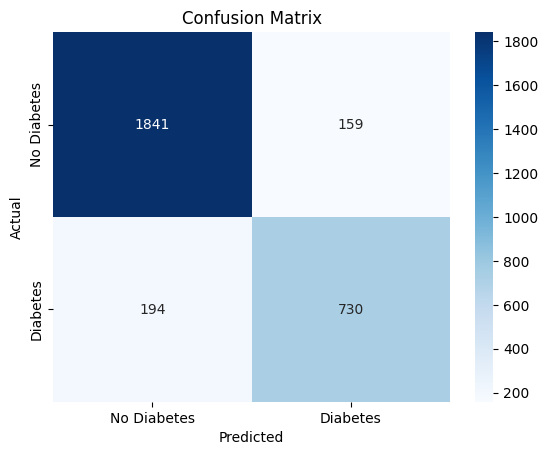

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot it
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


SVM Accuracy: 0.83
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      2000
           1       0.76      0.69      0.73       924

    accuracy                           0.83      2924
   macro avg       0.81      0.80      0.80      2924
weighted avg       0.83      0.83      0.83      2924



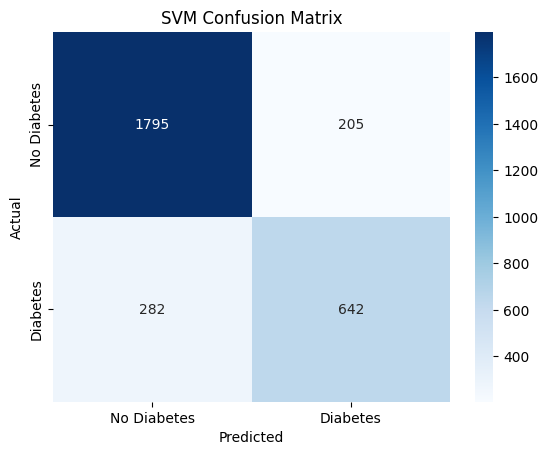

In [17]:
# Train with SVM
from sklearn.svm import SVC

# Step 1: Train SVM model
svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train, y_train)

# Step 2: Make predictions
y_pred_svm = svm_model.predict(X_test)

# Step 3: Validate predictions
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

# Classification Report
svm_report = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", svm_report)

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()



Logistic Regression Accuracy: 0.86
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      2000
           1       0.80      0.75      0.78       924

    accuracy                           0.86      2924
   macro avg       0.85      0.83      0.84      2924
weighted avg       0.86      0.86      0.86      2924



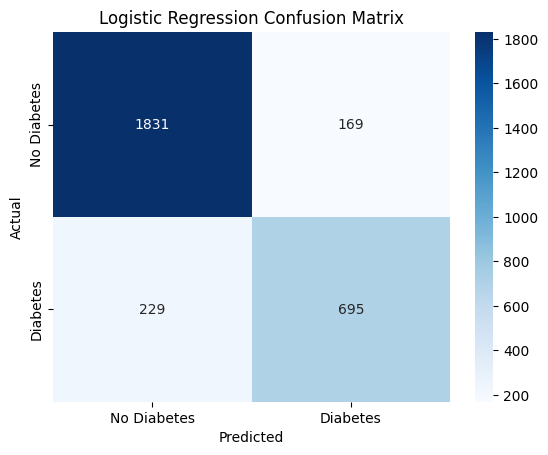

In [19]:
from sklearn.linear_model import LogisticRegression

# Step 1: Train Logistic Regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Step 2: Make predictions
y_pred_log = log_model.predict(X_test)

# Step 3: Validate predictions
# Accuracy
log_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")

# Classification Report
log_report = classification_report(y_test, y_pred_log)
print("Logistic Regression Classification Report:\n", log_report)

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()
